#  Regularized Logistic Regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.<br>
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.<br>

The file <strong><em>ex2data2.csv</em></strong> contains a training set.<br>
The structure of the dataset described blow:<br>
1. First column = <strong>First test score</strong> 
2. Second column = <strong>Second test score</strong>
3. Third column = <strong>Accepted (1=yes, 0=no)</strong>

<br> <br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Loading dataset
    2. Ploting scatter
        1. 2D scatter
        2. 3D scatter
2. Feature Mapping
3. Implementation
    1. Cost Function and Gradient
    2. Learning Parameters Using <em>scipy.optimize.minimize</em>
4. Evaluating Logistic Regression
    1. Plotting Decision Boundry
    2. Predicting on Test Data
    3. Accuracy on Training Data
5.  Try out Different Regularization Parameters
</strong>

In each section full description provided.

## 1. Plotting Dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot. (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2D plot.)

### 1.A Loading Dataset
We just need to import our data in file to a good structrue to work on it. So best option for us in python is <strong>Pandas</strong>.

In [1]:
# import library
import pandas as pd
import numpy as np

dataset = pd.read_csv('ex2data2.csv',names = ['Test #1','Test #2','Accepted'])
dataset.head()

,Test #1,Test #2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [2]:
# splitting to x and y variables for features and target variable
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print('x[0] ={}, y[0] ={}'.format(x[0],y[0]))
m, n = x.shape
print('#{} Number of training samples, #{} features per sample'.format(m,n))

x[0] =[ 0.051267  0.69956 ], y[0] =1
#118 Number of training samples, #2 features per sample


### 1.B Plotting Scatter
In this step we plot our data in 2D and 3D scatter.

#### 1.B.a 3D Scatter

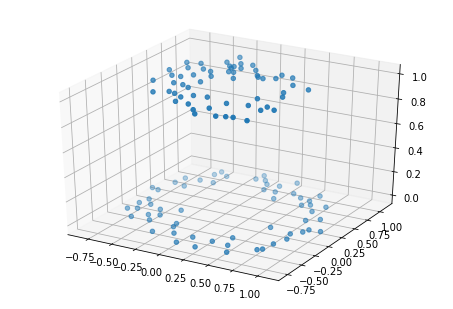

In [3]:
# imporing libraries
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

# visualize our data
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x[:,0], x[:,1], y)
plt.show()

#### 1.B.b 2D Scatter

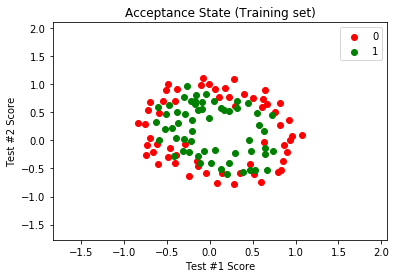

In [5]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Acceptance State (Training set)')
plt.xlabel('Test #1 Score')
plt.ylabel('Test #2 Score')
plt.legend()
plt.show()

Above figure shows that <strong>our dataset cannot be separated into positive and negative examples by a straight-line</strong> through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

## 2. Feature Mapping
One way to fit the data better is to <strong>create more features</strong> from each data point. We will map the features into all <strong>polynomial</strong> terms of x<sub>1</sub> and x<sub>2</sub> up to the <strong>sixth power</strong>. Our new x should be like this: <img src='img/map_feature.jpg'><br>
As a result of this mapping, our vector of two features (the scores on two QA tests) has been <strong>transformed into a 28-dimensional vector</strong>. A logistic regression classifier trained on this <strong>higher-dimension feature</strong> vector will have a more <strong>complex decision boundary</strong> and will appear <strong>nonlinear</strong> when drawn in our 2-dimensional plot.<br><br>
While the feature mapping allows us to build a <strong>more expressive classifier</strong>, it also <strong>more susceptible to overfitting</strong>. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how <strong>regularization can help combat the overfitting problem</strong>.<br> <br>
In this step we use <a href='http://scikit learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html'>preprocessing module</a> of sklearn library.


In [8]:
# import library
from sklearn.preprocessing import PolynomialFeatures

# We also add one column of ones to interpret theta 0 (x with power of 0 = 1) by include_bias as True
pf = PolynomialFeatures(degree = 6, include_bias = True)
x_poly = pf.fit_transform(x)
pd.DataFrame(x_poly).head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193
